# Test 1 — Classification: Adult Income

**Name:** María Donoso
**Date:** 22/09/2025

The main goal of this notebook is to gather, clean, and do an exploratory analysis (EDA) of our data, before building any model.

First of all, we select our environment previously created as the kernel for this notebook and run the following cell:

In [197]:
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')


# reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)


# package versions
import sklearn
print('python', sys.version.split()[0])
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('scikit-learn', sklearn.__version__)
print('matplotlib', plt.matplotlib.__version__)
print('seaborn', sns.__version__)


# plot defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

python 3.10.18
pandas 2.3.2
numpy 2.2.6
scikit-learn 1.7.2
matplotlib 3.10.6
seaborn 0.13.2


## GATHERING DATA
Gathering the right data is essential to set a proper foundation for our analysis. In our case, the selected dataset is open source and free, and comes from the University of California Irvine machine learning repository. It consists of some information of different adults and whether their income is over $50000 a year. (Becker, B. & Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20).

In [198]:
# original url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' 
data_path = '../data/adult.csv'
# column names (14 features + 1 target)
col_names =["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
        "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
        "hours_per_week", "native_country", "income"]
df = pd.read_csv(data_path, header=None, names=col_names, na_values=' ?')
print('Shape:', df.shape)

Shape: (32561, 15)


In [199]:
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [200]:
# apply strip() method to all strings to eliminate white spaces
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

**Attribute documentation** 
- `age`: integer.
- `workclass`: categorical (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).
- `fnlwgt`: integer (final weight, this is the number of people the census believes the entry represents).
- `education`: categorical (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).
- `education-num`: integer.
- `marital-status`: categorical ( Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse).
- `occupation`: categorical (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces).
- `relationship`: categorical (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).
- `race`: categorical (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black).
- `sex`: binary (Female, Male).
- `capital-gain`: integer.
- `capital-loss`: integer.
- `hours-per-week`: integer.
- `native-country`: categorical (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)
- `income`: binary (50K, <=50K)


In [201]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [202]:
# number of unique values per column
for c in df.columns:
    print(c, df[c].nunique(), 'unique')

age 73 unique
workclass 8 unique
fnlwgt 21648 unique
education 16 unique
education_num 16 unique
marital_status 7 unique
occupation 14 unique
relationship 6 unique
race 5 unique
sex 2 unique
capital_gain 119 unique
capital_loss 92 unique
hours_per_week 94 unique
native_country 41 unique
income 2 unique


In [203]:
# dataset statistics (for numerical features)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [204]:
# Numerical features
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical features:", num_cols)
# Categorical features
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical features:", cat_cols)

Numerical features: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
Categorical features: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


## CLEANING AND EXPLORING DATA 
A popular saying within data science is "garbage in, garbage out", which means that cleaning data properly is key to producing accurate and reliable results. Exploratory Data Analysis (EDA) is all about exploring and understanding the data we are working with before building models. By applying cleaning techniques, we can summarize the data, identify key statistics, and uncover patterns. Nevertheless, it is also important to explore the raw data beforehand, as this provides insight into how the data was collected. The most effective approach is therefore to combine both perspectives: analyzing the data in its original form and after cleaning.

#### TARGET VARIABLE

First of all, we convert `income` variable from categorical to numerical (0 = "income <= 50K", 1 = "income > 50K"). Most ML classification algorithms expect the target variable to be numeric, as they are designed to predict numerical labels rather than string categories. This transformation makes the target suitable for model training and evaluation while preserving the original meaning of the classes.

In [205]:
df["income"]= df["income"].apply(lambda x: 1 if x.strip() =='>50K' else 0)
df["income"].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [206]:
df[df["income"] == 1].describe().T #statistics for adults with income >50K

,count,mean,std,min,25%,50%,75%,max
age,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0
fnlwgt,7841.0,188005.000000,102541.775472,14878.0,119101.0,176101.0,230959.0,1226583.0
education_num,7841.0,11.611657,2.385129,2.0,10.0,12.0,13.0,16.0
capital_gain,7841.0,4006.142456,14570.378951,0.0,0.0,0.0,0.0,99999.0
capital_loss,7841.0,195.001530,595.487574,0.0,0.0,0.0,0.0,3683.0
hours_per_week,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0
income,7841.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


There are 7841 adults with income >50K, with an average age of about 44 years (ranging from 19 to 90). On average, they completed around 12 years of education, work about 45 hours per week, and show higher values in capital gain compared to the general population.

#### MISSING VALUES
To follow with, we deal with missing values.

In [207]:
# Rows with missing values
df[df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,1
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,0
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [208]:
# Columns with missing values
print(df.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [209]:
cols_with_na = [c for c in df.columns if df[c].isna().sum()>0]
for c in cols_with_na:
    print(f"Percentage of missing values in '{c}' column : {df.isna().sum()[c]/len(df) * 100} %")

Percentage of missing values in 'workclass' column : 5.638647461687294 %
Percentage of missing values in 'occupation' column : 5.660145572924664 %
Percentage of missing values in 'native_country' column : 1.7904855501980899 %


The percentage of the entries with NaN values is very low as compared to the length of the data of that particular columns. Therefore, it seems that dropping the NaN values should be good choice but we can't be sure at all. That is why we plot the categorical variables distribution to have a global insight.

#### CATEGORICAL VARIABLES
In this section we are going to focus on categorical features and whether we apply One-Hot or Label Encoding. First one involves creating new binary columns for each unique category in a feature. 

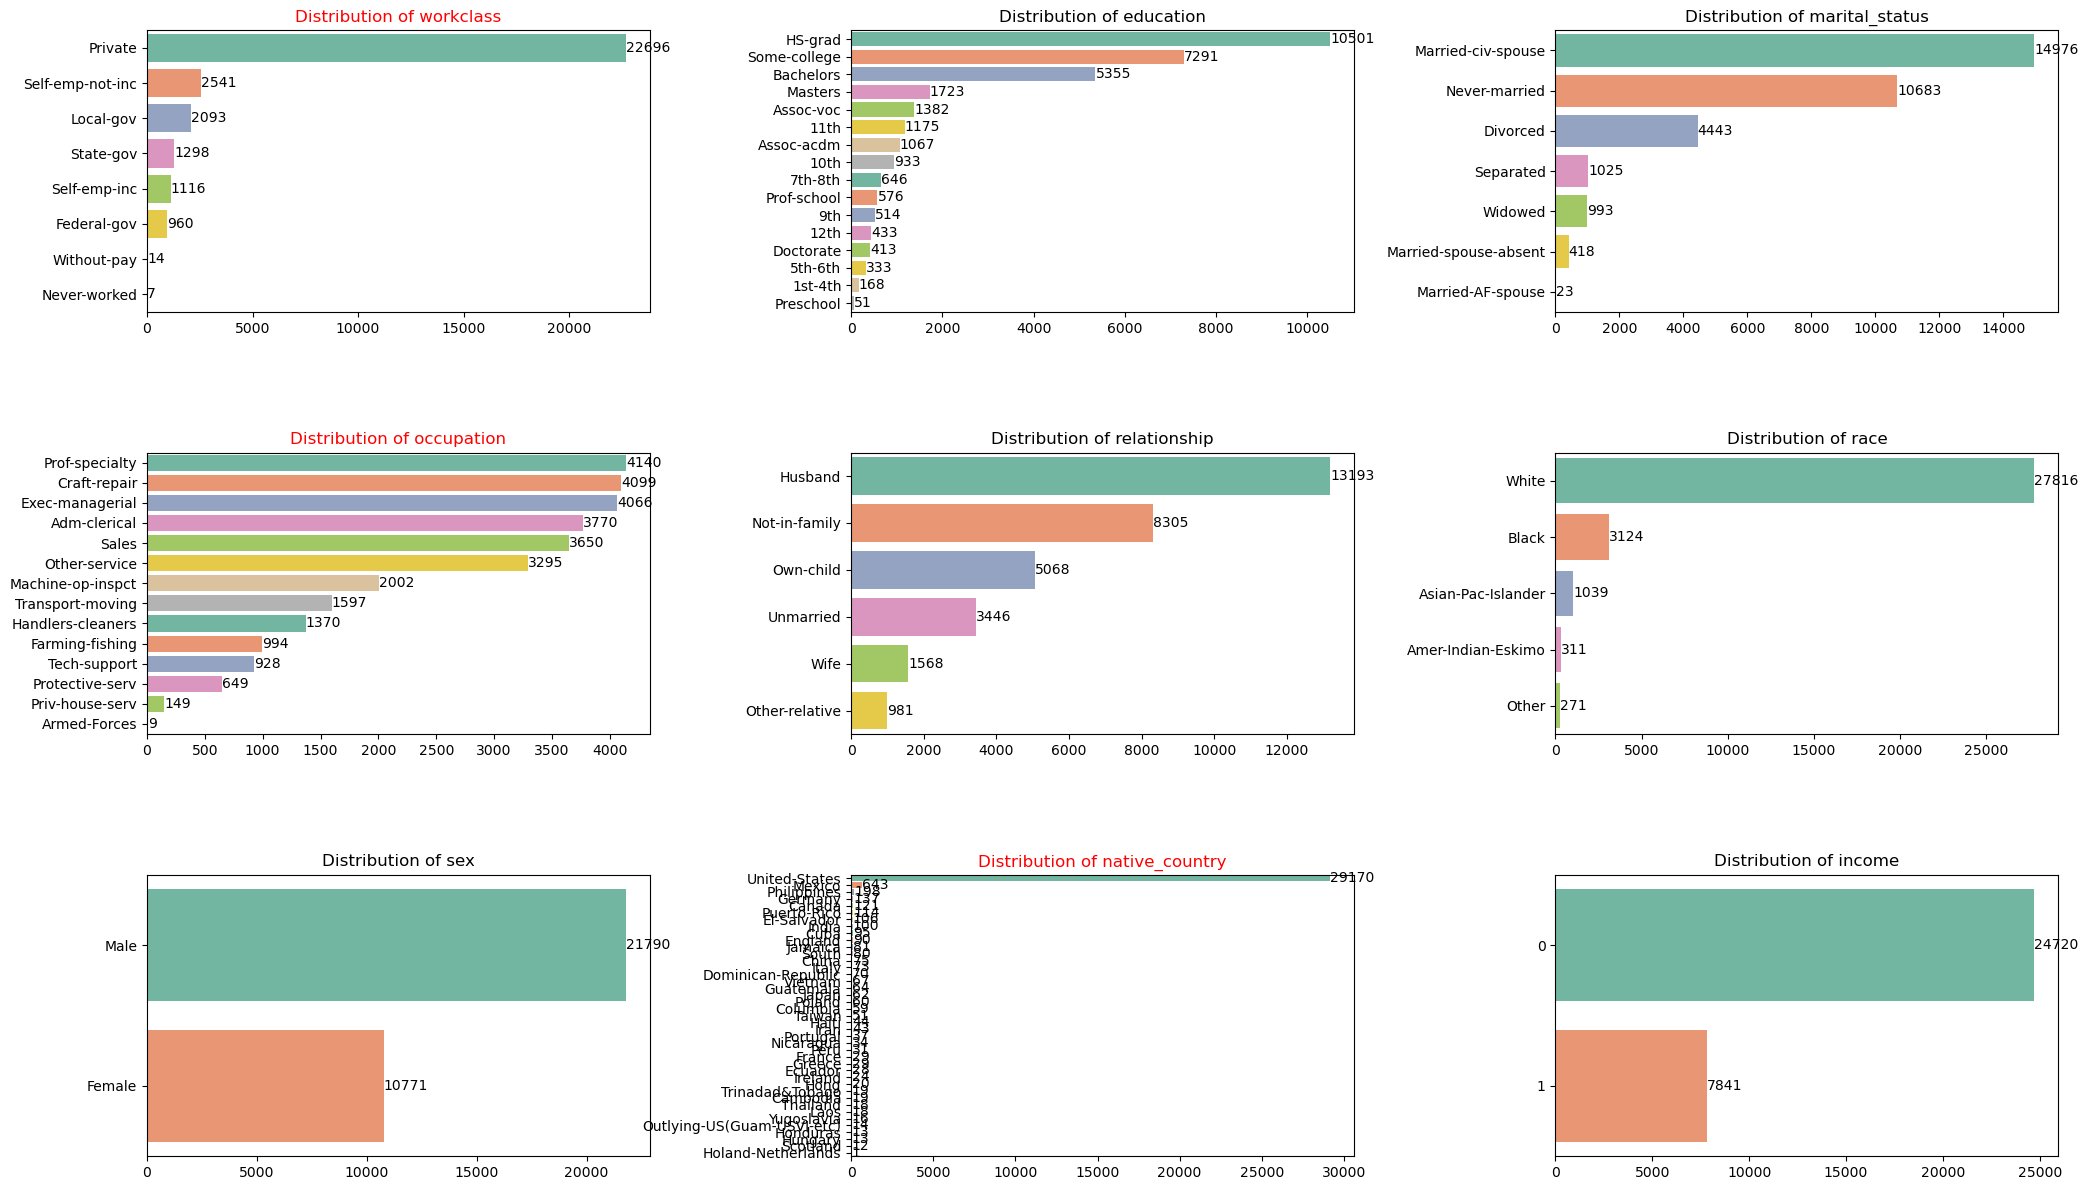

In [210]:
# Categorical variables distribution in a grid of plots
n_cats = len(cat_cols) # Number of categorical variables
n_cols = 3
n_rows = n_cats // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 4*n_rows))
axes = axes.flatten()

for i, c in enumerate(cat_cols):
    sns.countplot(y=c, data=df, ax=axes[i], palette="Set2", order = df[c].value_counts().index)
    if c in cols_with_na:
        color= "red" # Highlight columns with NaN values
    else:
        color= "black"
    axes[i].set_title(f"Distribution of {c}", color=color)
    axes[i].set_xlabel("")  
    axes[i].set_ylabel("")
    # Add count labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.4) 
plt.show()

From the figure above, we can see that the most frequent category for the **workclass** attribute is "Private". While it might seem reasonable to fill missing values with "Private", doing so would involve making an assumption without strong justification, which could introduce future errors in the model. For the **occupation** attribute, there is no clear way to infer missing values based solely on other features, so a careful imputation strategy should be considered later (probably eliminating those values).

**NATIVE_COUNTRY**


Regarding **native_country**, let's look the distribution plot more in detail to grab conclusions:

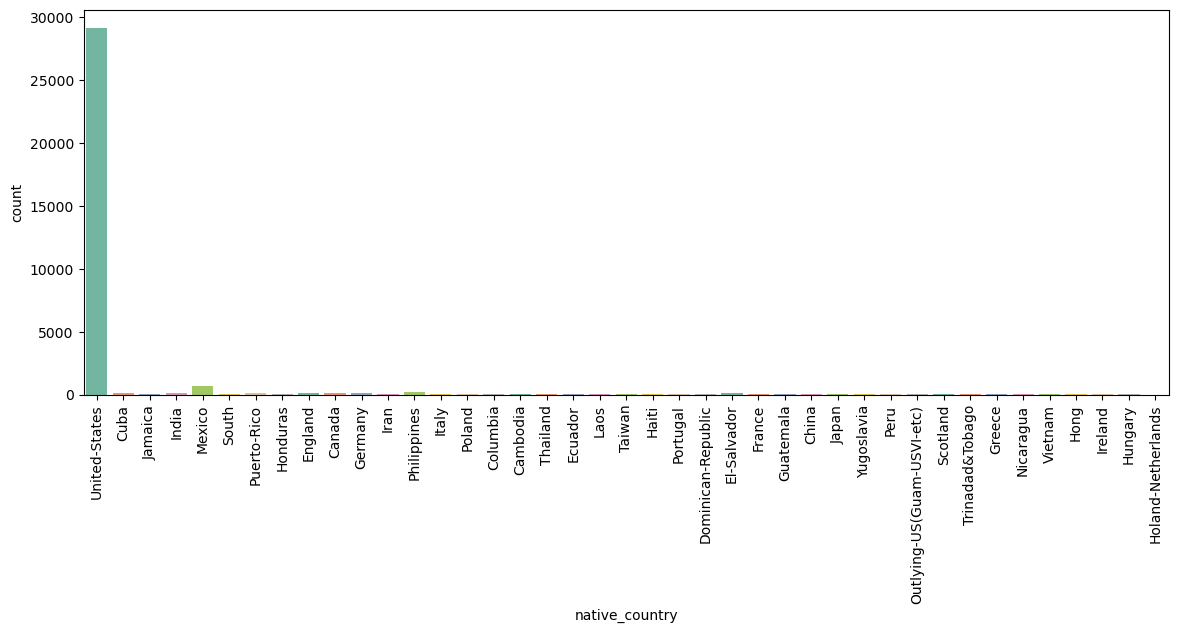

In [211]:
plt.figure(figsize = (14,5))
sns.countplot(x="native_country", data=df, palette="Set2")
plt.xticks(rotation = 90);

In [212]:
# calculate percentage of adults from United-States
us_percentage = (df['native_country'].value_counts(normalize=True)['United-States']) * 100
print(f"Percentage of adults from United-States: {us_percentage:.2f} %")

Percentage of adults from United-States: 91.22 %


We observe that the majority of adults (91.22%) are from the United States, so it is reasonable to assume that the 1.8% of missing values also belong to "United-States". Based on this, we will impute missing values accordingly and convert native_country into a binary feature with two categories: "United-States" and "Other"

In [213]:
df["native_country"].fillna('United-States', inplace=True)
df['native_country'] = df['native_country'].apply(lambda x: 'Other' if x.strip() != 'United-States' else x)
df["native_country"].value_counts()

native_country
United-States    29753
Other             2808
Name: count, dtype: int64

In [214]:
df.isna().sum() #no missing values for native_country anymore

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [215]:
# We eliminate rows with missing values in workclass and occupation (just about 7% of the data, so we can afford to lose them)
df.dropna(inplace=True)

In [216]:
df_encoded_native_country = pd.get_dummies(df["native_country"], dtype=int, prefix="nc")
df_encoded_native_country.head(5)

,nc_Other,nc_United-States
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


**RACE**

The same as **native_country** happens to **race** variable, so we convert it into a binary feature with two categories: "White" and "Other"

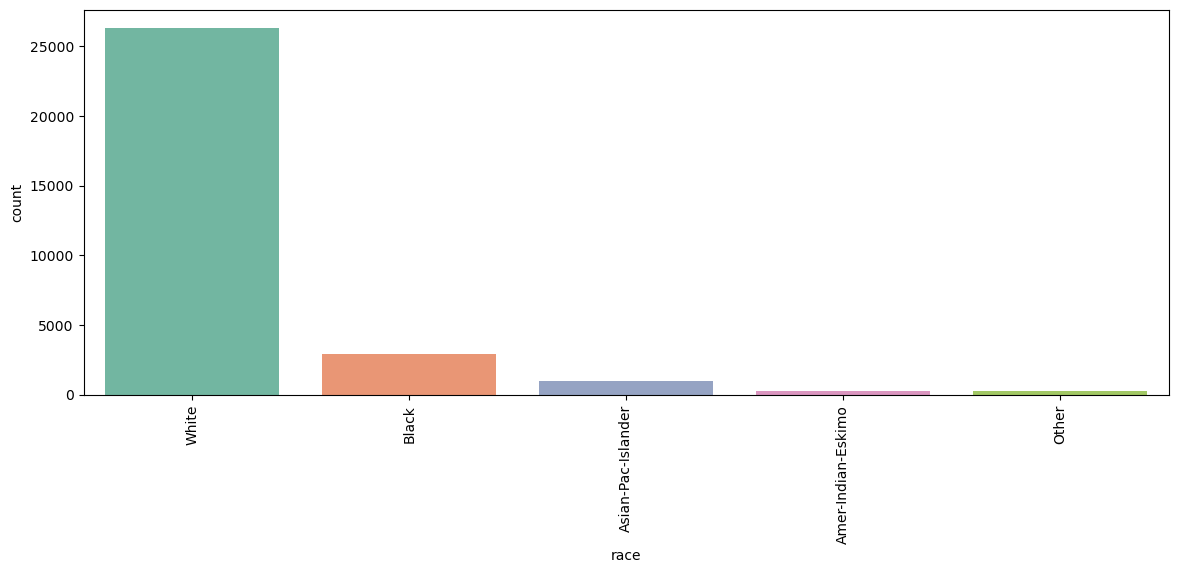

In [217]:
plt.figure(figsize = (14,5))
sns.countplot(x="race", data=df, palette="Set2")
plt.xticks(rotation = 90);

In [218]:
df['race'] = df['race'].apply(lambda x: 'Other' if x != 'White' else x)
df["race"].value_counts()

race
White    26301
Other     4417
Name: count, dtype: int64

In [219]:
df_encoded_race = pd.get_dummies(df["race"], dtype=int, prefix="race")
df_encoded_race.head(5)

,race_Other,race_White
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


**EDUCATION**

First of all, we can check that **education** and **education_num** are equivalent by plotting its scatterplot. It is clear that each education level corresponds to just one education_num, which is ordered by the ascending order of each year. 

In [220]:
education_order = ["1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
                   "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters", "Doctorate"]

In [221]:
# education_map = {'School': 1,
#                  'HS-grad': 2,
#                  'Some-college': 3,
#                  'Bachelors': 4,
#                  'Prof-school': 5,
#                  'Associate': 6,
#                  'Masters': 7,
#                  'Doctorate': 8}

These categories have a clear order, where "Doctorate" represents a higher level of education than "Masters", which in turn is higher than "School", and so on. In this case, label encoding can effectively capture the ordinal nature of the data:

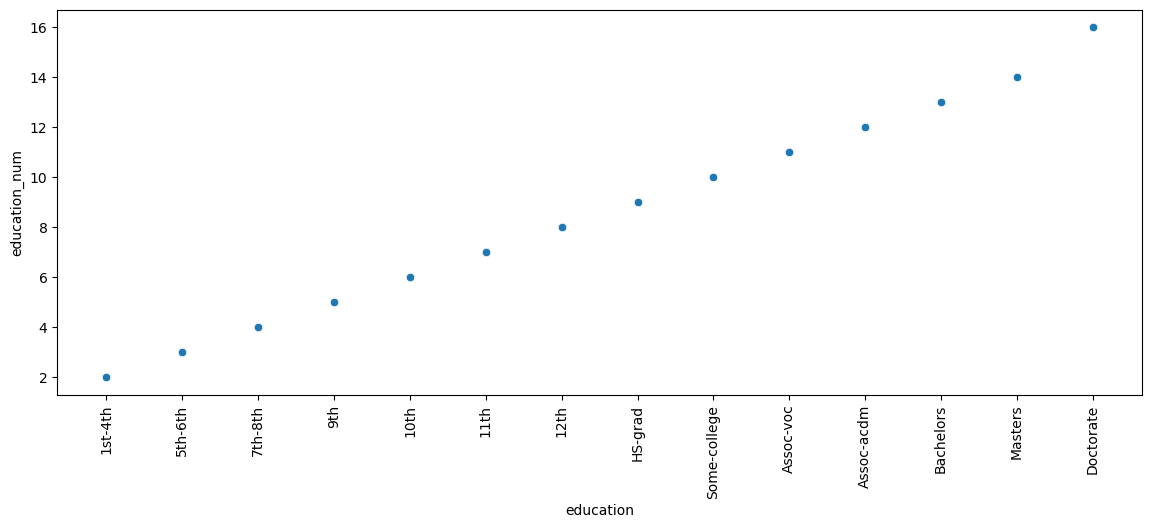

In [222]:
df["education"] = pd.Categorical(df["education"], categories=education_order, ordered=True)
plt.figure(figsize = (14,5))
sns.scatterplot(x="education",y="education_num", data=df, palette="Set2")
plt.xticks(rotation = 90);

In [223]:
# We just eliminate education column and keep education_num
df = df.drop(columns=['education'])

**WORKCLASS**

In [224]:
df_encoded_workclass = pd.get_dummies(df["workclass"], dtype=int, prefix="wc")
df_encoded_workclass.head(5)

,wc_Federal-gov,wc_Local-gov,wc_Private,wc_Self-emp-inc,wc_Self-emp-not-inc,wc_State-gov,wc_Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


**MARITAL_STATUS**

In [225]:
df["marital_status"].value_counts()

marital_status
Married-civ-spouse       14339
Never-married             9912
Divorced                  4258
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: int64

In [226]:
df['marital_status'] = df['marital_status'].apply(lambda x: 'Prev-Married' if (x == 'Widowed' or x == 'Divorced' or x == 'Separated') else x)
df['marital_status'] = df['marital_status'].apply(lambda x: 'Married' if (x == 'Married-civ-spouse' or x == 'Married-spouse-absent' or x == 'Married-AF-spouse') else x)

In [227]:
df_encoded_marital_status = pd.get_dummies(df["marital_status"], dtype=int, prefix="ms")
df_encoded_marital_status.head(5)

,ms_Married,ms_Never-married,ms_Prev-Married
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


**OCCUPATION**

Y AQUI EXPLICO COMO HACER CON ESTE CAMPO con ONE_HOT ENCODNING

In [228]:
df_encoded_occupation = pd.get_dummies(df["occupation"], dtype=int, prefix="occ")
df_encoded_occupation.head(5)

,occ_Adm-clerical,occ_Armed-Forces,occ_Craft-repair,occ_Exec-managerial,occ_Farming-fishing,occ_Handlers-cleaners,occ_Machine-op-inspct,occ_Other-service,occ_Priv-house-serv,occ_Prof-specialty,occ_Protective-serv,occ_Sales,occ_Tech-support,occ_Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**RELATIONSHIP**

Y AQUI EXPLICO COMO HACER CON ESTE CAMPO con ONE_HOT ENCODNING

In [229]:
df_encoded_relationship = pd.get_dummies(df["relationship"], dtype=int, prefix="rel")
df_encoded_relationship.head(5)

,rel_Husband,rel_Not-in-family,rel_Other-relative,rel_Own-child,rel_Unmarried,rel_Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


**SEX**

Y AQUI EXPLICO COMO HACER CON ESTE CAMPO con ONE_HOT ENCODNING

In [230]:
df_encoded_sex = pd.get_dummies(df["sex"], dtype=int, prefix="sex")
df_encoded_sex.head(5)

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [231]:
final_df = df.drop(columns=['workclass', 'marital_status', 'occupation', 'relationship', "race", "sex", "native_country"])
final_df= pd.concat([final_df, df_encoded_workclass, df_encoded_marital_status, df_encoded_occupation, df_encoded_relationship, df_encoded_race, df_encoded_sex, df_encoded_native_country], axis=1)

In [232]:
final_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,wc_Federal-gov,wc_Local-gov,wc_Private,...,rel_Other-relative,rel_Own-child,rel_Unmarried,rel_Wife,race_Other,race_White,sex_Female,sex_Male,nc_Other,nc_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,1,0,1,1,0,0,1
32557,40,154374,9,0,0,40,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,1,0,0,1,1,0,0,1
32559,22,201490,9,0,0,20,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1


In [233]:
move_income = final_df.pop("income")
final_df.insert(len(final_df.columns), "income", move_income )

In [236]:
# right now we have 43 features
final_df.shape 

(30718, 43)

## SAVING DATA
The final step consists of saving our processed data to train different classification models.

In [238]:
final_df.to_csv('../data/processed_adult.csv', index=False)

#### NUMERICAL VARIABLES
NO SE SI AQUI HACER ALGO PARA OBSERVAR BIEN CAPITAL GAIN; CAPITAL LOSS Y HOURS PER WEEK (capital difference??)

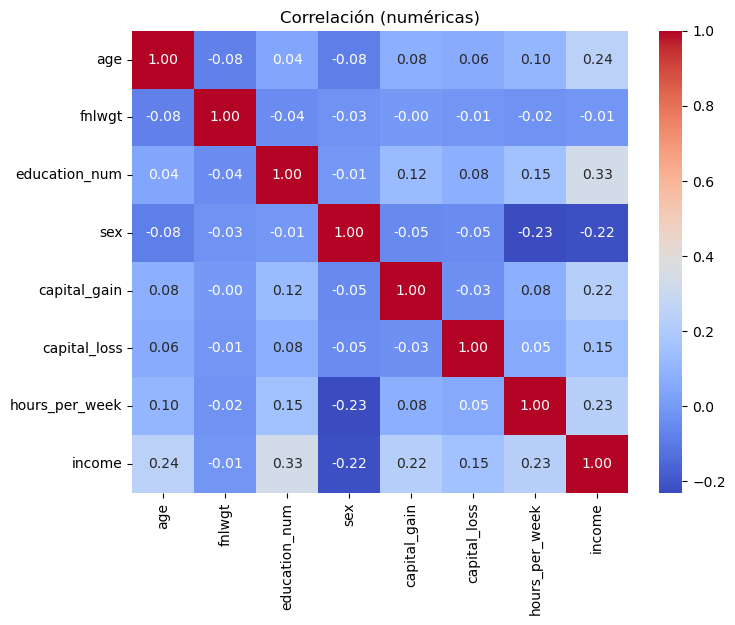

In [71]:
# matriz de correlación simple (numéricas)
plt.figure(figsize=(8,6))
num_df = df.select_dtypes(include=['float64','int64']).drop(columns=['num','target'], errors='ignore')
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlación (numéricas)')
plt.show()